C:\Users\syuug\AppData\Local\Temp/ipykernel_10808/162296499.py:16: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = mplot3d.Axes3D(figure)


tilt is  0.9999999999999999
x max -68.99999999999999 73.25
b is -47.39999999999999
x is -25.850000000000012
init body range is [[  0.           0.           0.        ]
 [-69.         -29.78417266   0.        ]
 [-69.         -73.25         0.        ]
 [ 69.         -73.25         0.        ]
 [ 69.         -29.78417266   0.        ]]
new body range is [[0, 0, 0], [-69.0, -68.99999999999999, 0], [-21.600000000000012, -73.25, 0], [33.108542713567836, -14.29145728643216, 0]]
l body max is 109.25 36.0
slice data is  [  0.         -69.         -73.25       -14.29145729]
arm max is: 61.736610278869904 20.343413913403356
4
tilt is  -2.3076923076923523
left arm ovar range
####### [-28.637768985458685, -28.637768985458678, 0]
y= 0.9999999999999998 x + 0.0
range is -69.0 0.0 -41.15199114246003
range is -69.0 0.0 -28.637768985458685
in range 0 1
########## [-41.15199114246003, -41.15199114246002, 0]
y= -0.08966244725738429 x + -75.1867088607595
range is -69.0 -21.600000000000012 -27.47096275585

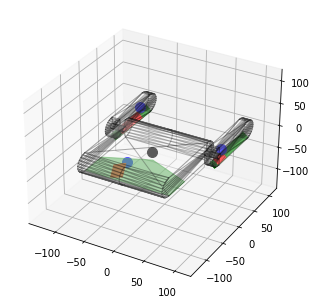

In [8]:
from operator import le
from turtle import color, left
import numpy as np
from stl import mesh
from mpl_toolkits import mplot3d
from matplotlib import pyplot

import sys
sys.path.append('./script/')
from rotation_matrix import RotationMatrix
from plot_ground_test import EstimateGround
from mesh_adj import MeshAdj


figure = pyplot.figure()
ax = mplot3d.Axes3D(figure)

# meshの読み込み
body_mesh = mesh.Mesh.from_file('../stl/low_model/body.stl')
left_arm_mesh = mesh.Mesh.from_file('../stl/low_model/flipper-arm.stl')
right_arm_mesh = mesh.Mesh.from_file('../stl/low_model/flipper-arm.stl')
copy_body_mesh = body_mesh

print(copy_body_mesh)
print(body_mesh)

# 位置の調整
body_init_pos = [0,0,-53.036]
left_arm_init_pos = [83.4,0,44.25]
right_arm_init_pos = [-83.4,0,44.25]

body_mesh = MeshAdj.mesh_location_zero(body_mesh,body_init_pos)
left_arm_mesh = MeshAdj.mesh_location_zero(left_arm_mesh,left_arm_init_pos)
right_arm_mesh = MeshAdj.mesh_location_zero(right_arm_mesh,right_arm_init_pos)


R = np.zeros((4, 4))
R[3,3] = 1
R[:3, :3] = tuple(RotationMatrix.x(-90)) #回転行列
R[:3,3:] = [[0],[0],[0]]                #並進ベクトル
# print("rotation matrix is:",R)
body_mesh.transform(R)
left_arm_mesh.transform(R)
right_arm_mesh.transform(R)


# 最終出力
cube_comb = mesh.Mesh(np.concatenate([
    copy_body_mesh.data.copy(),
    left_arm_mesh.data.copy(),
    right_arm_mesh.data.copy(),
]))
# ax.add_collection3d(mplot3d.art3d.Poly3DCollection(cube_comb.vectors))
ax.add_collection3d(mplot3d.art3d.Poly3DCollection(cube_comb.vectors,color='w',alpha=0.2,edgecolor='k'))

################設置点推定###############################
estimate_ground = EstimateGround()
left_arm_range,right_arm_range,body_range,gp = estimate_ground.get_ground_range()
ax.add_collection3d(mplot3d.art3d.Poly3DCollection([body_range],alpha=0.5,color='green'))
line= mplot3d.art3d.Line3D(left_arm_range[0], left_arm_range[1].T,left_arm_range[2].T, linewidth=8, color='green')
ax.add_line(line)
line= mplot3d.art3d.Line3D(right_arm_range[0], right_arm_range[1].T,right_arm_range[2].T, linewidth=8, color='green')
ax.add_line(line)

####################### 計算後##############################
# estimate_ground.right_tilt_range(44.13670419576012)
# estimate_ground.left_arm_estimate(10, 3.607347419164354)
# estimate_ground.left_tilt_range(-49.05478942680127)

# # for i in range(1):
# estimate_ground.right_arm_estimate(10, 1.4963403628093792)
# estimate_ground.left_arm_estimate(10, 3.607347419164354)

####################### 計算後##############################
estimate_ground.right_tilt_range(45)
estimate_ground.left_arm_estimate(10,  3.607347419164354)
estimate_ground.left_tilt_range(-66.571307191255)
estimate_ground.right_arm_estimate(10, 1.4963403628093792)

# 60.86700527636417

# for i in range(1):
#     estimate_ground.right_arm_estimate(10, 3.1786190549806435)
# #     estimate_ground.left_arm_estimate(10, 1.3089541364375148)


left_arm_range,right_arm_range,body_range,gp = estimate_ground.get_ground_range()
ax.add_collection3d(mplot3d.art3d.Poly3DCollection([body_range],alpha=1,color='red'))

line= mplot3d.art3d.Line3D(left_arm_range[0], left_arm_range[1].T,left_arm_range[2].T, linewidth=8, color='red')
ax.add_line(line)
line= mplot3d.art3d.Line3D(right_arm_range[0], right_arm_range[1].T,right_arm_range[2].T, linewidth=8, color='red')
ax.add_line(line)

# 中央値の計算と範囲
left_arm_ground_pos =[left_arm_range[0,0],(left_arm_range[1,1]+left_arm_range[1,0])/2]
left_arm_distrib = left_arm_range[1,1]-left_arm_ground_pos[1]
print("left arm ground pos",left_arm_ground_pos,left_arm_distrib)

right_arm_ground_pos =[right_arm_range[0,0],(right_arm_range[1,1]+right_arm_range[1,0])/2]
right_arm_distrib = right_arm_range[1,1]-right_arm_ground_pos[1]
print("right arm ground pos",right_arm_ground_pos,right_arm_distrib)

body_ground_pos =[(max(body_range[:,0:1])+min(body_range[:,0:1]))/2,(max(body_range[:,1:2])+min(body_range[:,1:2]))/2]
body_distrib = max(body_range[:,0:1])-body_ground_pos[0]
body_distrib2 = max(body_range[:,1:2])-body_ground_pos[1]
print("body  ground pos",body_ground_pos,body_distrib,body_distrib2)

# print("ground point1",right_arm_ground_pos[0]-body_ground_pos[0],right_arm_ground_pos[1]-body_ground_pos[1])
# print("ground point2",left_arm_ground_pos[0]-body_ground_pos[0],left_arm_ground_pos[1]-body_ground_pos[1])

print("ground right arm",right_arm_ground_pos[0],right_arm_ground_pos[1])
print("ground left arm",left_arm_ground_pos[0],left_arm_ground_pos[1])


scale = cube_comb.points.flatten()
ax.auto_scale_xyz(scale, scale, scale)

body_mesh = MeshAdj.mesh_update(body_mesh)
points = MeshAdj.get_mesh_center(body_mesh)
#重心のプロット
ax.scatter(gp[0], gp[1], gp[2], s = 100, c = "black")
#推定範囲の中心点プロット
ax.scatter(left_arm_ground_pos[0], 70, 0, s = 100, c = "blue")
ax.scatter(right_arm_ground_pos[0], 20, 0, s = 100, c = "blue")
ax.scatter(-100+right_arm_ground_pos[0], -80, 0, s = 100, c = "blue")


pyplot.show()